In [1]:
import cv2
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
path = "../All_data_sets/dataset"

In [4]:
os.listdir(path)

['.ipynb_checkpoints',
 'dog_1.jpeg',
 'dog_2.jpeg',
 'dog_3.jpg',
 'dog_4.jpg',
 'mb_1.jpeg',
 'mb_2.jpeg',
 'pichuka_1.jpeg',
 'pichuka_2.jpeg',
 'pichuka_3.jpeg']

# Transformations

In [5]:
image = cv2.imread( path+'/mb_2.jpeg' )

In [6]:
image.shape

(251, 201, 3)

In [7]:
def display(img):
    # cv2.imshow('mahesh',image) 
    # cv2.waitKey(0) 
    # cv2.destroyAllWindows()
    
    plt.imshow(img)
    plt.axis("off")
    plt.show()

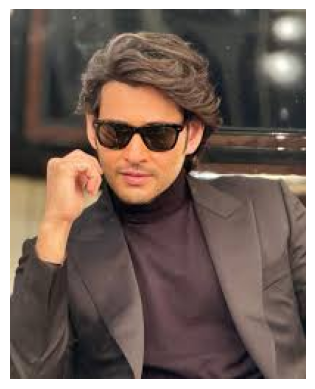

In [8]:
display( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

### Translation (Shifting the image)

In [9]:
rows, cols = image.shape[:2]

In [10]:
# Translation matrix (move 100 px right, 50 px down)
M = np.float32([[1, 0, 100], [0, 1, 50]])
translated = cv2.warpAffine(image, M, (cols, rows))

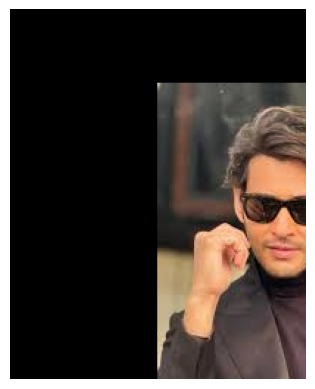

In [11]:
display( cv2.cvtColor(translated, cv2.COLOR_BGR2RGB) )

## Rotation

In [12]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated = cv2.warpAffine(image, M, (cols, rows))

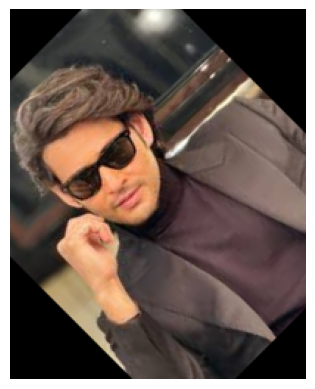

In [13]:
display( cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB) )

## Scaling (Resizing)

In [14]:
scaled_up = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

scaled_down = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

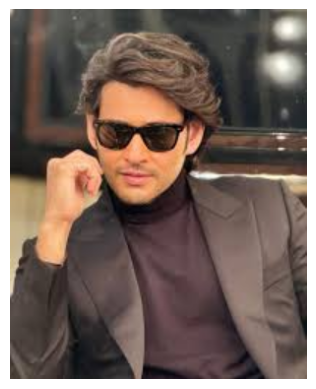

In [15]:
display( cv2.cvtColor(scaled_up, cv2.COLOR_BGR2RGB) )

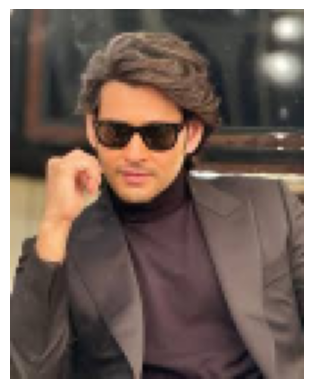

In [16]:
display( cv2.cvtColor(scaled_down, cv2.COLOR_BGR2RGB) )

In [17]:
image.shape

(251, 201, 3)

In [18]:
scaled_up.shape

(376, 302, 3)

In [19]:
scaled_down.shape

(126, 100, 3)

## Flipping : Mirror effect.

In [20]:
flip_h = cv2.flip(image, 1)   # Horizontal
flip_v = cv2.flip(image, 0)   # Vertical
flip_both = cv2.flip(image, -1) # Both

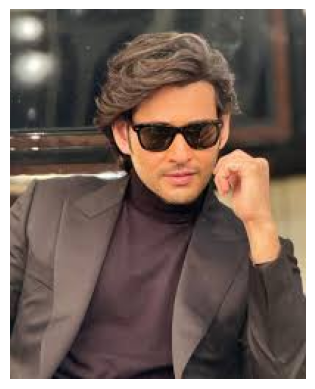

In [21]:
display( cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB) )

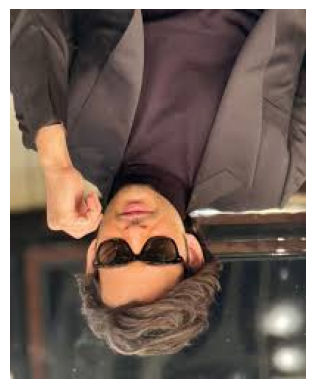

In [22]:
display( cv2.cvtColor(flip_v, cv2.COLOR_BGR2RGB) )

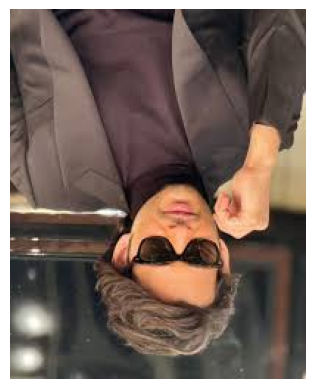

In [23]:
display( cv2.cvtColor(flip_both, cv2.COLOR_BGR2RGB) )

## Affine Transformation 
## Affine transformation keeps parallel lines parallel.
## We need 3 points in the input image → mapped to 3 points in the output.

In [24]:
# Define 3 points in the input image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define where they should map in the output image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Get transformation matrix
M = cv2.getAffineTransform(pts1, pts2)

# Apply transformation
affine = cv2.warpAffine(image, M, (cols, rows))

In [25]:
pts2

array([[ 10., 100.],
       [200.,  50.],
       [100., 250.]], dtype=float32)

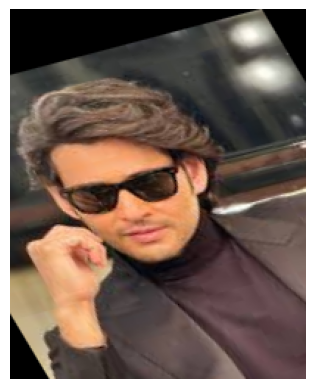

In [26]:
display( cv2.cvtColor(affine, cv2.COLOR_BGR2RGB) )

## Perspective Transformation

## Perspective transformation can change the viewpoint — e.g., fix tilted documents.
## We need 4 points in input → mapped to 4 points in output.

In [27]:
# Define 4 points in input (corners of a region)
pts1 = np.float32([[56,65], [368,52], [28,387], [389,390]])

# Define 4 corresponding points in output
pts2 = np.float32([[0,0], [300,0], [0,300], [300,300]])

# Get transformation matrix
M = cv2.getPerspectiveTransform(pts1, pts2)

# Apply perspective warp
perspective = cv2.warpPerspective(image, M, (300, 300))

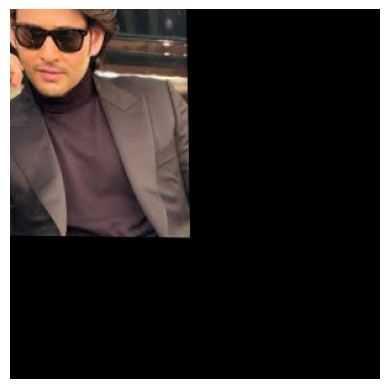

In [28]:
display( cv2.cvtColor(perspective, cv2.COLOR_BGR2RGB) )